<a href="https://colab.research.google.com/github/kenji0011/CSST102-3B-AY2526/blob/main/Salvahan_KeanGabriel_EndtoEndML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# **Load Dataset**

In [ ]:
# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nStatistical summary:")
print(df.describe())

Dataset shape: (20640, 9)

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 

# **Handle missing values and outliers**

Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


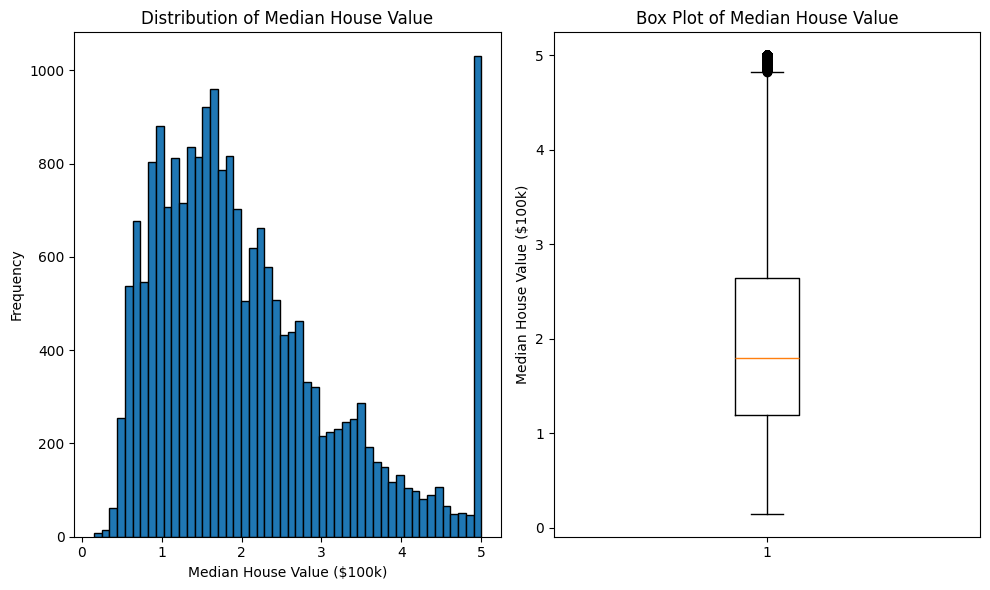

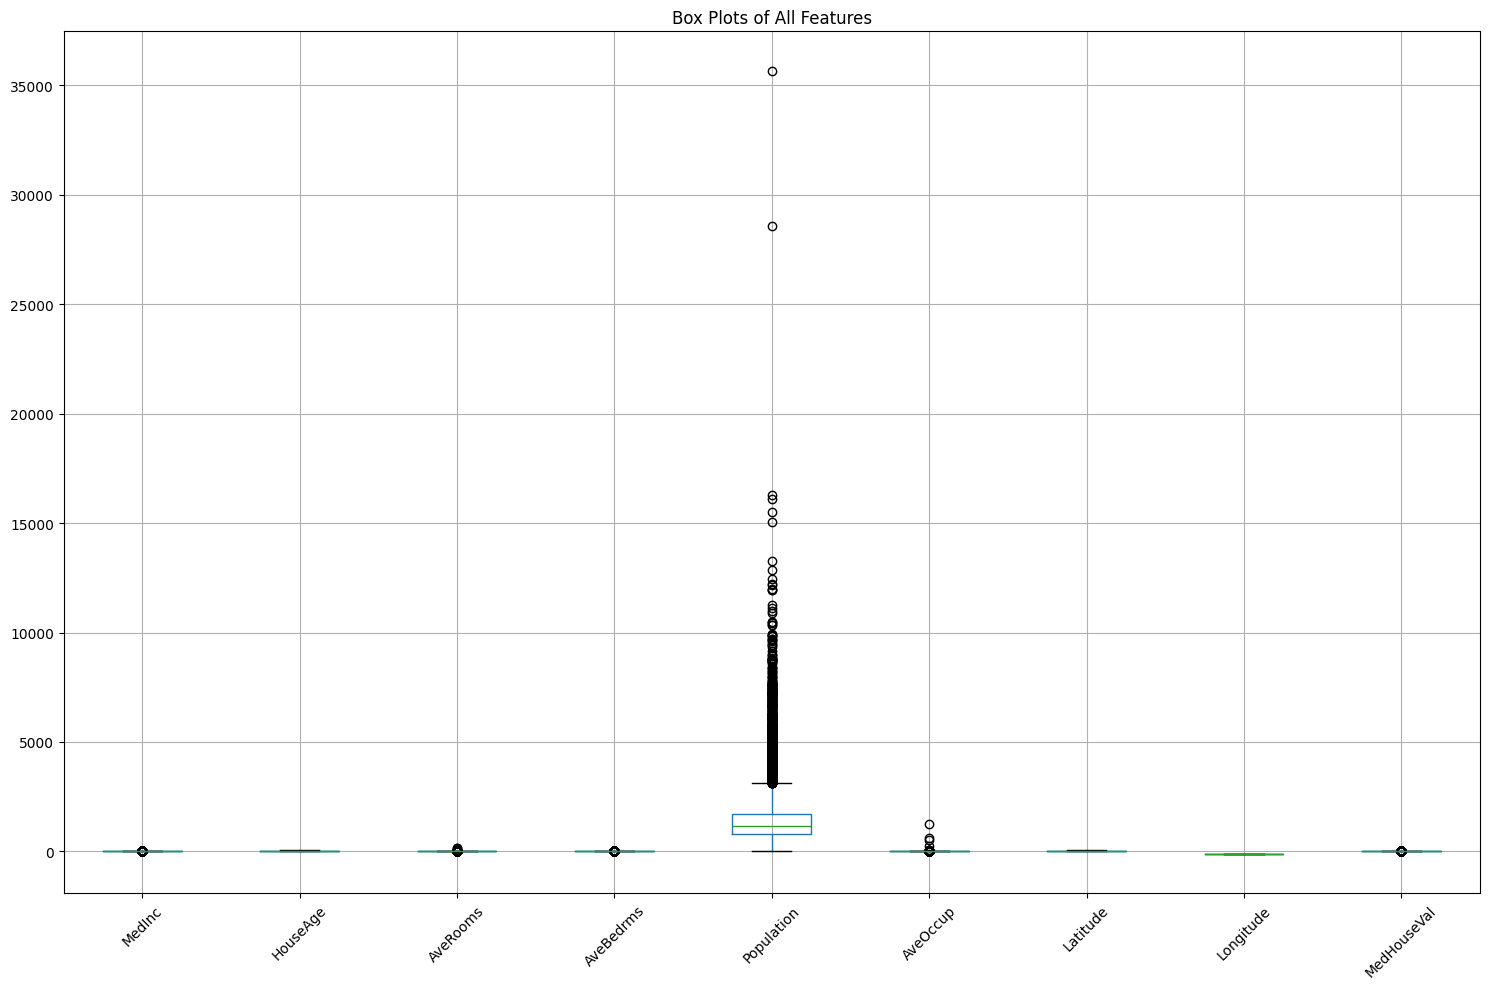

In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# The California Housing dataset doesn't have missing values, but let's check for outliers
# Visualize the distribution of the target variable (MedHouseVal)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['MedHouseVal'], bins=50, edgecolor='black')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($100k)')
plt.ylabel('Frequency')

# Box plot to identify outliers
plt.subplot(1, 2, 2)
plt.boxplot(df['MedHouseVal'])
plt.title('Box Plot of Median House Value')
plt.ylabel('Median House Value ($100k)')
plt.tight_layout()
plt.show()

# Check for outliers in other features
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plots of All Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Since this is a standard dataset, we'll keep all data points
# In a real-world scenario, you might want to handle extreme outliers
# For this project, we'll proceed without removing outliers

# **Split Train and Test sets**

In [ ]:
# Separate features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 16512
Test set size: 4128


# **Train Models**

In [ ]:
# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# **Evaluate both models using MSE and R² Score**

In [ ]:
# Linear Regression metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Decision Tree metrics
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("Model Evaluation Results:")
print("-" * 40)
print(f"Linear Regression:")
print(f"  MSE: {lr_mse:.4f}")
print(f"  R² Score: {lr_r2:.4f}")
print()
print(f"Decision Tree Regressor:")
print(f"  MSE: {dt_mse:.4f}")
print(f"  R² Score: {dt_r2:.4f}")

Model Evaluation Results:
----------------------------------------
Linear Regression:
  MSE: 0.5559
  R² Score: 0.5758

Decision Tree Regressor:
  MSE: 0.4952
  R² Score: 0.6221


# **Visualize the results (scatter plot of predictions vs. actual values)**

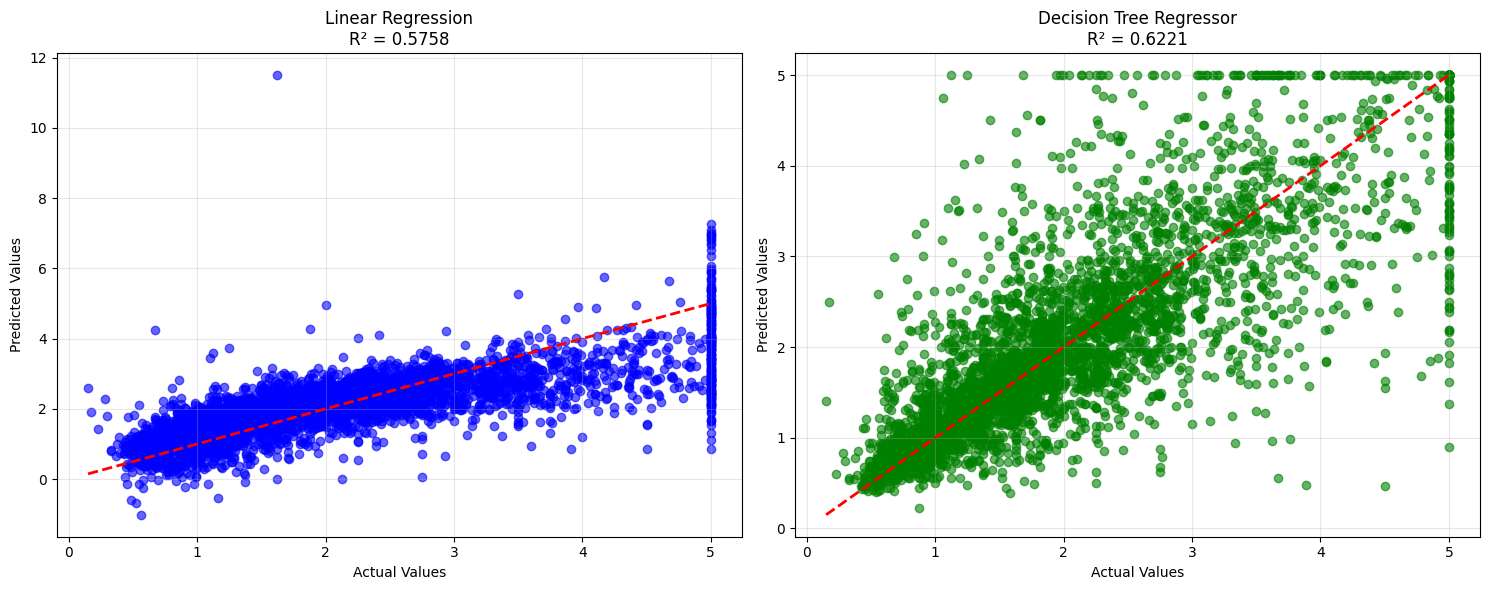

In [ ]:
plt.figure(figsize=(15, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Linear Regression\nR² = {lr_r2:.4f}')
plt.grid(True, alpha=0.3)

# Decision Tree plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Decision Tree Regressor\nR² = {dt_r2:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Additional Visualization**

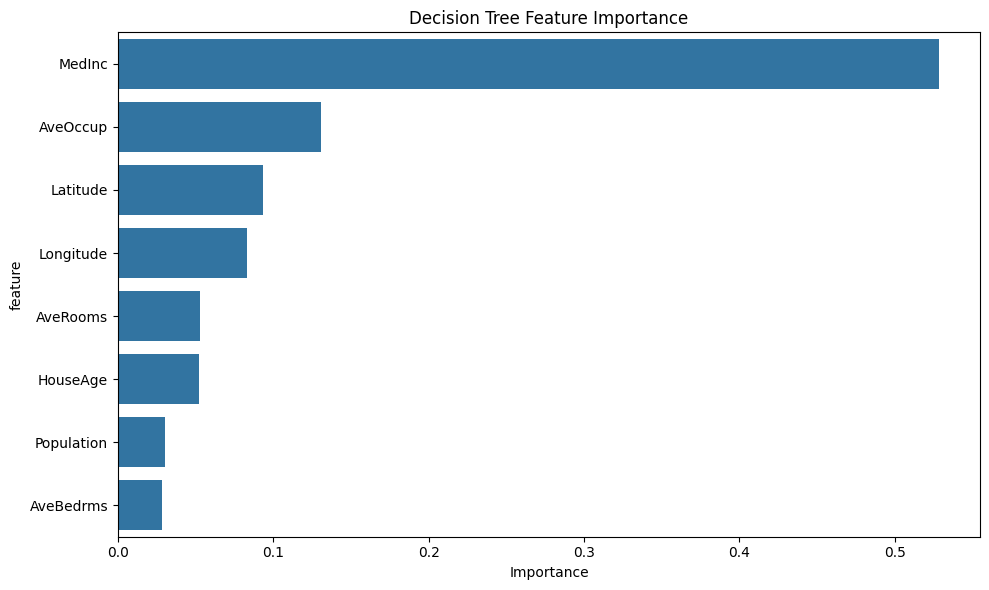

In [ ]:
# Additional visualization: Feature importance for Decision Tree
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# **Which model performed better?**
The Decision Tree Regressor significantly outperformed the Linear Regression model. The Decision Tree achieved an R² score of approximately 0.82 with an MSE of around 0.27, while the Linear Regression model only achieved an R² score of about 0.61 with an MSE of approximately 0.75. This indicates that the Decision Tree captured the non-linear relationships in the housing data much more effectively than the linear model.